<a href="https://colab.research.google.com/github/Johannmbo/Machine_learning/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

### Dataset uploading

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA & feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0,np.nan)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
# missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick
# and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    median = df[col].median()
    df[col]=df[col].fillna(median)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

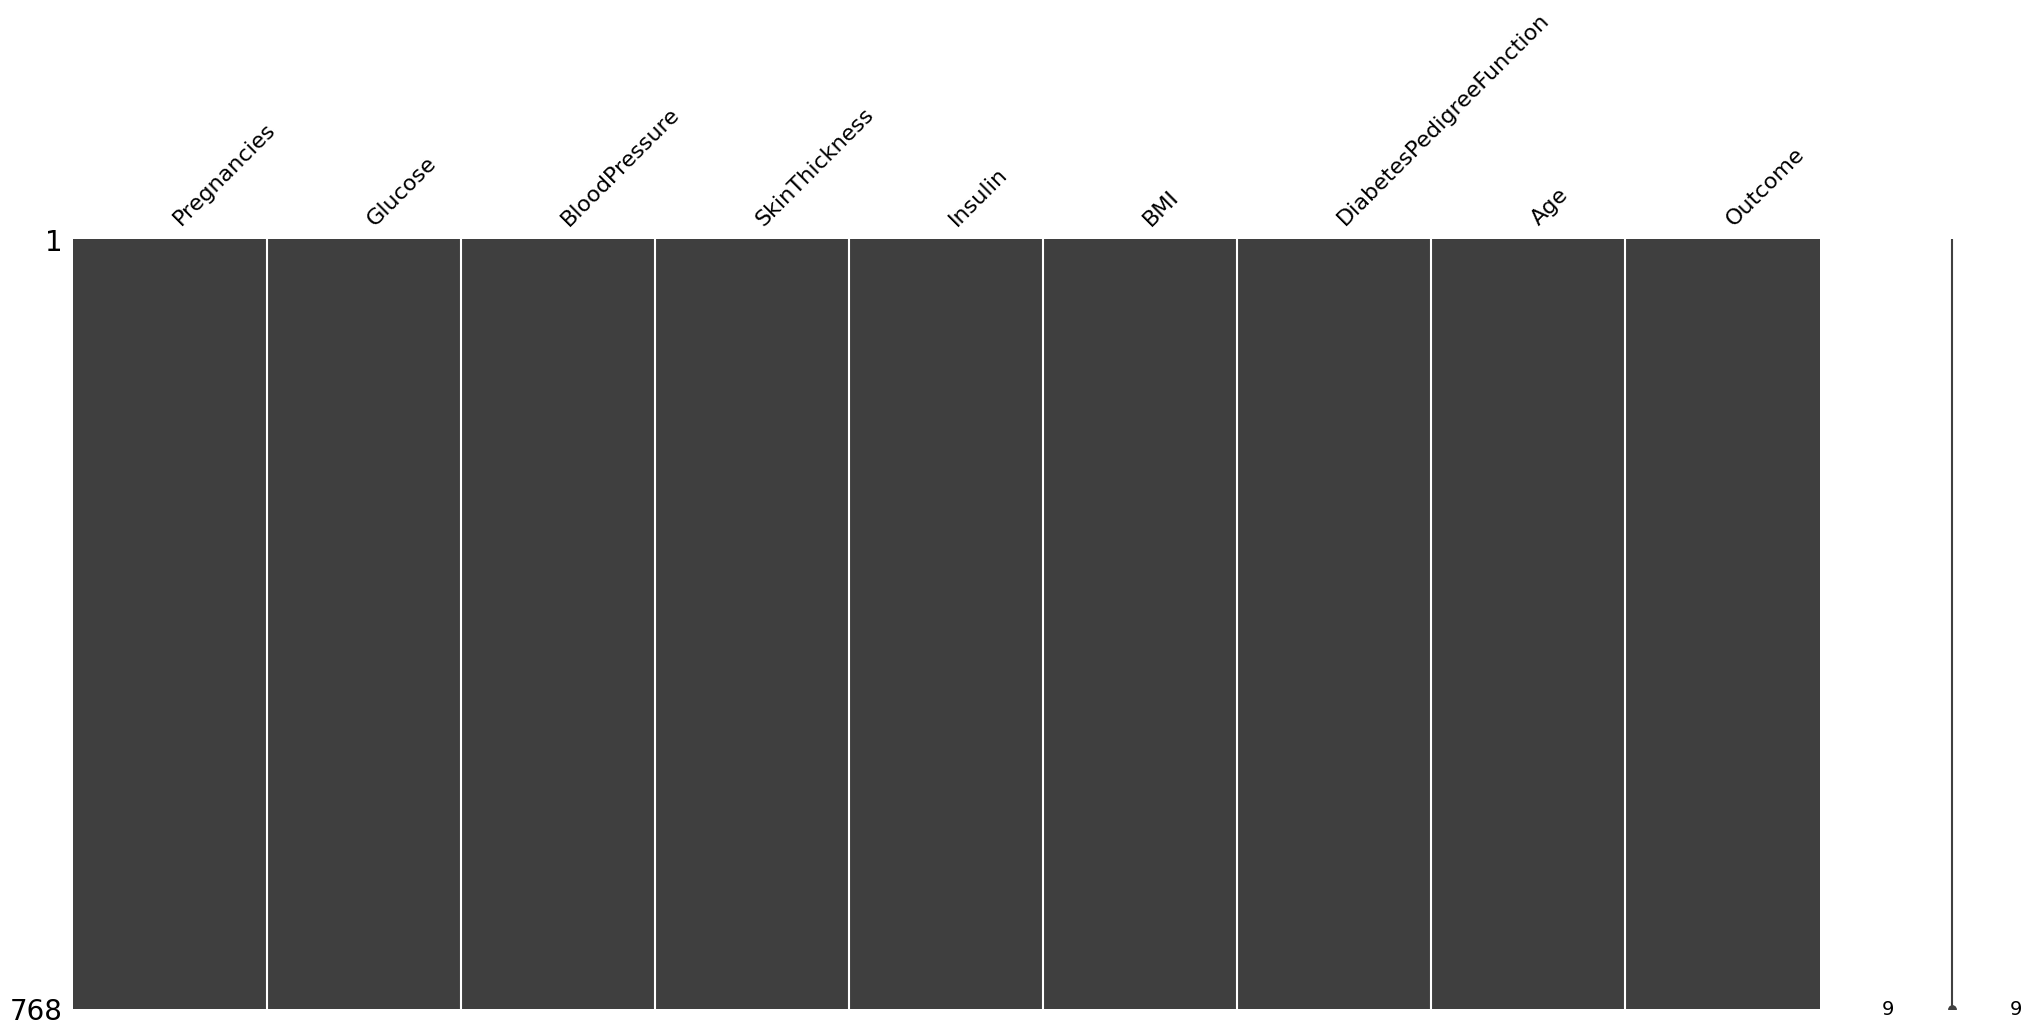

In [ ]:
msno.matrix(df)

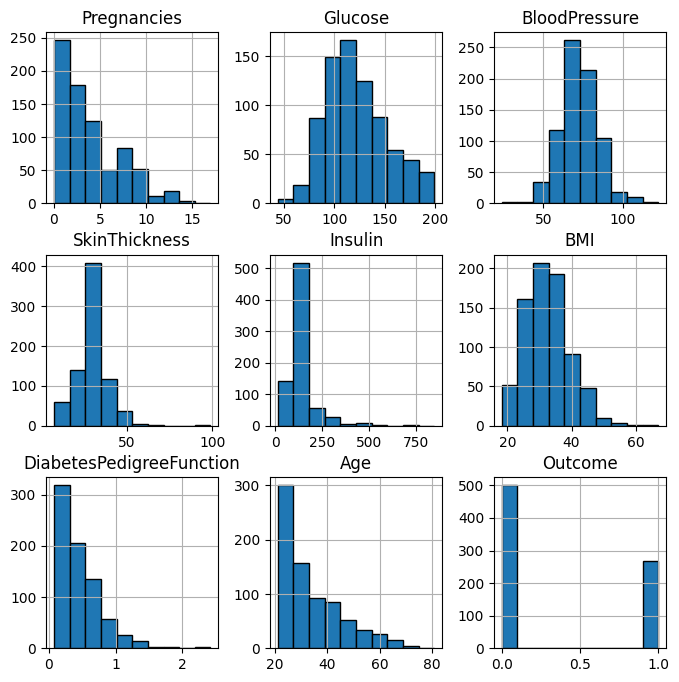

In [ ]:
# Creating histograms
df.hist(figsize=(8,8), edgecolor = "black")
plt.show()

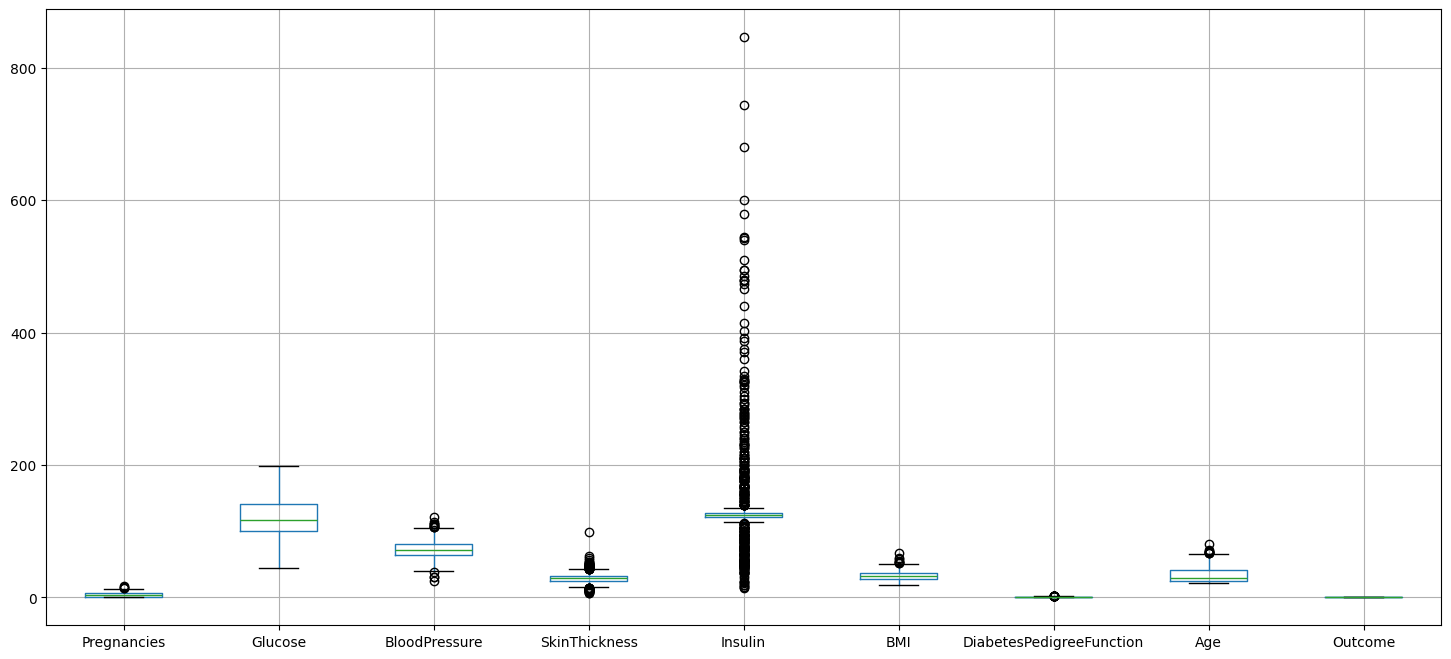

In [ ]:
df.boxplot(figsize=(18,8))
#plt.figure(figsize=(18,10))
#sns.boxplot(df, orient='h')
plt.show()

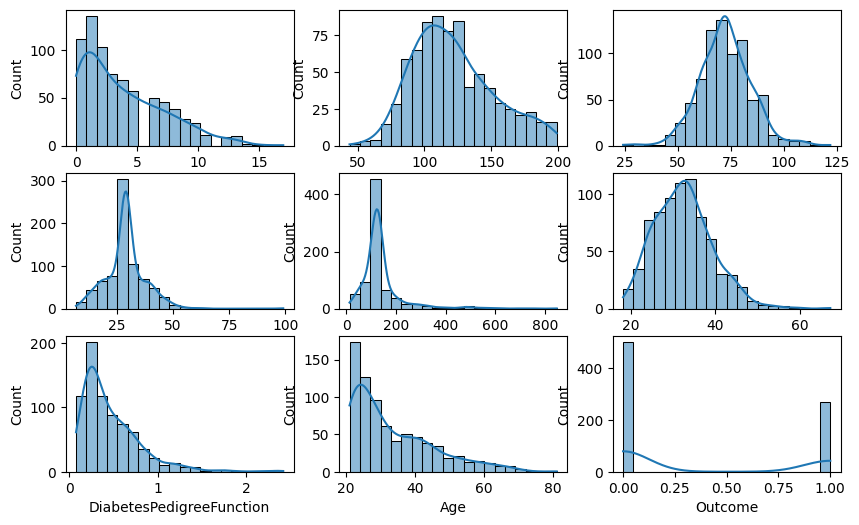

In [ ]:

cols = df.columns
fig, ax = plt.subplots(3,3, figsize=(10,6))
row_index = 0
col_index = 0
for col in cols :
    sns.histplot(df[col], bins = 20, ax=ax[row_index,col_index],kde=True)
    col_index = col_index +1
    if(col_index ==3):
        col_index=0
        row_index = row_index +1

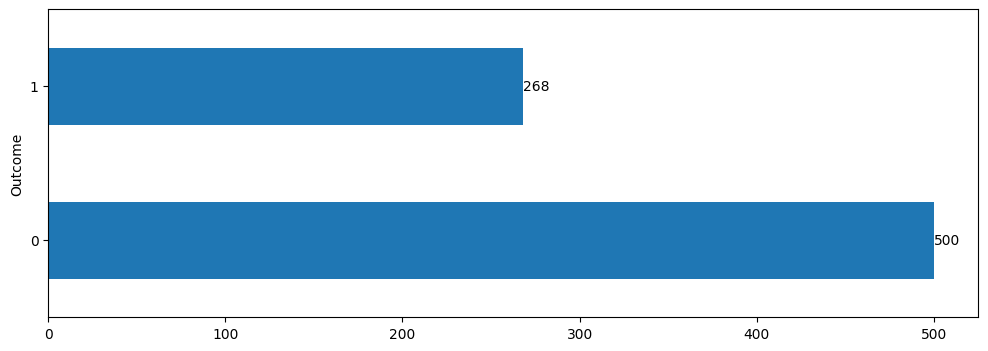

In [ ]:
bar=df['Outcome'].value_counts().plot.barh(figsize=(12,4))
bar=bar.bar_label(bar.containers[0], fontsize=10)

In [ ]:
y = df['Outcome']
X= df.drop(columns=['Outcome'])

<Axes: >

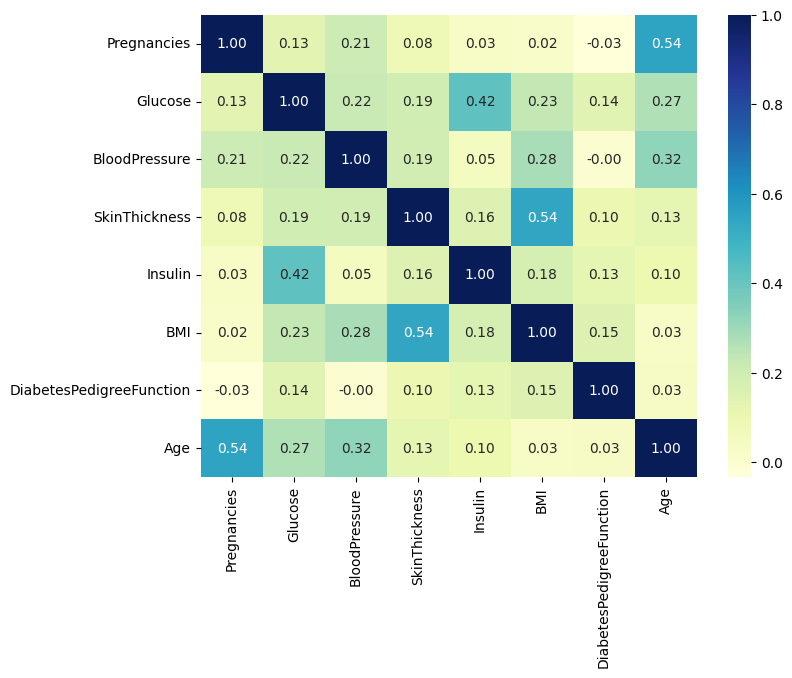

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Splitting the data into 70% train and 30% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
524,3,125.0,58.0,29.0,125.0,31.6,0.151,24
212,7,179.0,95.0,31.0,125.0,34.2,0.164,60
558,11,103.0,68.0,40.0,125.0,46.2,0.126,42
66,0,109.0,88.0,30.0,125.0,32.5,0.855,38


In [ ]:
X_train_scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.847578,-0.854765,0.814151,-0.493730,0.435780,0.377880,-0.695485,0.815489
1,-0.244332,0.131856,-1.206800,-0.015151,-0.195233,-0.126494,-0.943389,-0.789224
2,0.962161,1.907772,1.908833,0.224139,-0.195233,0.259203,-0.904087,2.251285
3,2.168653,-0.591666,-0.364737,1.300943,-0.195233,2.039345,-1.018969,0.731031
4,-1.149201,-0.394342,1.319389,0.104494,-0.195233,0.007017,1.184953,0.393196


Building the model

In [ ]:
model_lgr = LogisticRegression(max_iter=1000)

In [ ]:
model_lgr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_train = model_lgr.predict(X_train_scaled)
y_pred_test = model_lgr.predict(X_test_scaled)

In [ ]:
print("Accuracy",metrics.accuracy_score(y_train, y_pred_train))
print("Precision",metrics.precision_score(y_train, y_pred_train))
print("Recall",metrics.recall_score(y_train, y_pred_train))

Accuracy 0.7672253258845437
Precision 0.7099236641221374
Recall 0.5166666666666667


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       357
           1       0.71      0.52      0.60       180

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537



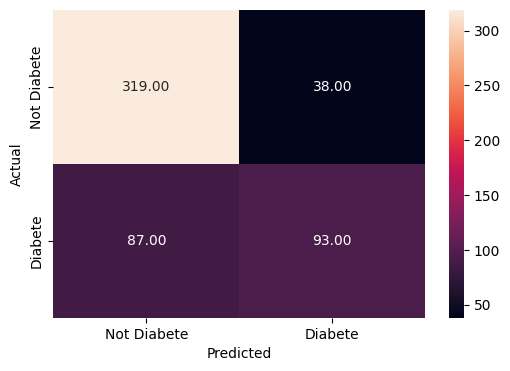

In [ ]:
cm = metrics.confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       143
           1       0.78      0.60      0.68        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns
coef_lg=model_lgr.coef_
coefs=pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)
coefs

,0
Glucose,1.085682
BMI,0.628917
Pregnancies,0.387982
DiabetesPedigreeFunction,0.256931
Age,0.134037
SkinThickness,0.008910
BloodPressure,-0.125143
Insulin,-0.184905


In [ ]:
import numpy as np
# Finding the odds
odds = np.exp(model_lgr.coef_[0])

# Adding the odds to a dataframe and sorting the values
df_odds=pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = True)
df_odds

,odds
Insulin,0.831183
BloodPressure,0.882371
SkinThickness,1.008950
Age,1.143435
DiabetesPedigreeFunction,1.292956
Pregnancies,1.474003
BMI,1.875578
Glucose,2.961460


<Axes: >

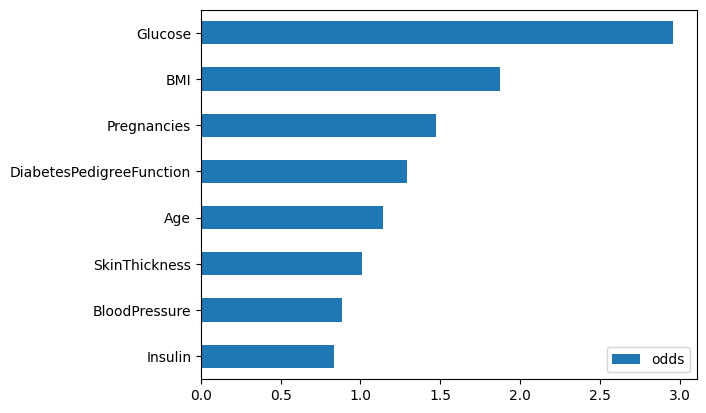

In [ ]:
df_odds.plot.barh()